<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <style>
    h1 {
      background-color: #006494;
      color: white;
      text-align: center;
      border-radius: 10px;
    }
  </style>
</head>
<body>
  <h1>DATA CLEANING</h1>
</body>
</html>

<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <style>
    body {
      font-family: Arial, sans-serif;
      line-height: 1.6;
      margin: 0;
      padding: 0;
      background-color: #13293d;
    }
    .container {
      max-width: 800px;
      margin: 2rem auto;
      padding: 1.5rem;
      background: white;
      border-radius: 8px;
      box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
    }
    h2 {
      color: #13293d;
      text-align: center;
      margin-bottom: 1.5rem;
    }
    h3 {
      color: #333;
      margin-top: 1.5rem;
      margin-bottom: 1rem;
    }
    p {
      color: #555;
      text-align: justify;
      margin-bottom: 1.5rem;
    }
    ul {
      color: #555;
      margin-left: 1.5rem;
      padding-left: 1rem;
    }
    ul li {
      margin-bottom: 0.5rem;
    }
    code {
      background-color: #f4f4f4;
      padding: 0.2rem 0.4rem;
      border-radius: 4px;
      font-size: 0.95rem;
      color: #c7254e;
    }
  </style>
</head>
<body>
  <div class="container">
    <h2>Data Cleaning Steps</h2>
    <h3>1. Check for Missing Data</h3>
    <p>Identify missing values and handle them by removing or imputing (e.g., using mean, median, or mode).</p>
    <h3>2. Check for Duplicated Data</h3>
    <p>Detect duplicate rows and remove them if unnecessary.</p>
    <h3>3. Check for Invalid Data</h3>
    <p>Identify and fix data that does not conform to expected ranges, formats, or types (e.g., negative values in age).</p>
    <h3>4. Check for Outliers</h3>
    <p>Use methods like <code>IQR</code> or <code>Z-score</code> to detect outliers and decide whether to remove, transform, or retain them.</p>
  </div>
  <br>
</body>
</html>


In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [150]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000) 

In [151]:
data_path = './data/raw_data/marketing_campaign.csv'

In [152]:
data = pd.read_csv(data_path, sep="\t")
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


# 1. Check for missing data

In [153]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

*Since the missing values account for only a very small proportion of the dataset (24 out of 2240 rows, approximately 1%), dropping them is unlikely to have a significant impact on the analysis.*

In [154]:
data = data.dropna()
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


# 2. Check for duplicated data

In [155]:
data.duplicated().sum()

np.int64(0)

# 3. Check for unvalid data

In [156]:
data.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216,2216,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1116,857,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5588.353339,1968.820397,NaN,NaN,52247.251354,0.441787,0.505415,NaN,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,NaN,NaN,25173.076661,0.536896,0.544181,NaN,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


# 4. Check for outliers

In [157]:
data.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216,2216,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1116,857,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5588.353339,1968.820397,NaN,NaN,52247.251354,0.441787,0.505415,NaN,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,NaN,NaN,25173.076661,0.536896,0.544181,NaN,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


In [158]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format="%d-%m-%Y")
data['Dt_Customer'].describe()

count                             2216
mean     2013-07-10 11:29:27.509025280
min                2012-07-30 00:00:00
25%                2013-01-16 00:00:00
50%                2013-07-08 12:00:00
75%                2013-12-31 00:00:00
max                2014-06-29 00:00:00
Name: Dt_Customer, dtype: object

**1. Birth Year and Enrollment Date Data Analysis**

**Birth Year Data Analysis**
Based on the percentiles and min/max values of the birth year data, we observe:

- 25th Percentile (Q1): 1959  
- 50th Percentile (Median/Q2): 1970  
- 75th Percentile (Q3): 1977  
- Maximum Value (Max): 1996  
- Minimum Value (Min): 1893  


**Customer Enrollment Date Analysis**
Based on the percentiles and min/max values of the enrollment date data, we observe:

- Minimum Value (Min): 2012-07-30  
- 25th Percentile (Q1): 2013-01-16  
- 50th Percentile (Median/Q2): 2013-07-08  
- 75th Percentile (Q3): 2013-12-31  
- Maximum Value (Max): 2014-06-29  

The enrollment dates are tightly concentrated between 2012 and 2014, indicating that most customers enrolled within this timeframe.

*→ Observations*
When analyzing the birth year data in relation to the enrollment date data, a clear anomaly emerges. If someone was born in 1893, they would have been 119 years old at the time of enrollment in 2012, which is highly improbable. This strongly suggests that the birth year value of 1893 is either a data entry error or an outlier.

*→ Conclusion*
- The birth year value of 1893 is likely an erroneous data point that should be reviewed and corrected.  
- The enrollment date data appears consistent and does not require further adjustments.  
- Cross-referencing related data fields (e.g., birth year and enrollment date) is critical for identifying and resolving inconsistencies in the dataset.

---

**2. Income Data Analysis**

- 25th Percentile (Q1): 35,303  
- 50th Percentile (Median): 51,381.5  
- 75th Percentile (Q3): 68,522  
- Maximum Value (Max): 666,666  
- Minimum Value (Min): 1,730  

*→ Observations* 

The maximum income value (Max) of 666,666 is significantly distant from the other percentiles, indicating it may be an outlier or a data entry error. While most of the income data is concentrated between 35,303 and 68,522, this value far exceeds the typical range.

*→ Conclusion*

The income value of 666,666 is likely an erroneous or outlier data point that should be reviewed and verified in the dataset.

---

**Summary**

In addition to the clear outliers in birth year and income data, other data fields do not show significant anomalies, and their values fall within reasonable ranges.


## Check for Birth Year Values Outliers

### Histogram for Birth Year Values Outliers

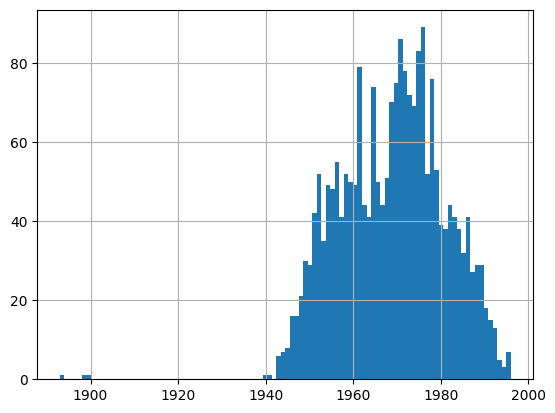

In [170]:
data['Year_Birth'].hist(bins=100)
plt.show()

*Observations*

Based on the description combined with the chart, the following can be noted:

- The youngest person was born in 1996, which still falls within the common age range.
- The common age range spans from 1940 to 1996, covering a period of 56 years.
- There are some data points indicating birth years before 1910, meaning these individuals would have been over 100 years old by 2012.

Since the earliest customer registration date is in 2012, individuals born before 1910 would be over 100 years old by 2012. Such cases are extremely rare and are likely data errors.

*→ Conclusion:*
To ensure the accuracy of the analysis, these unusual data points should be excluded from the calculations.

In [160]:
filtered_data_by_year_birth = data[data['Year_Birth'] >= 1910]

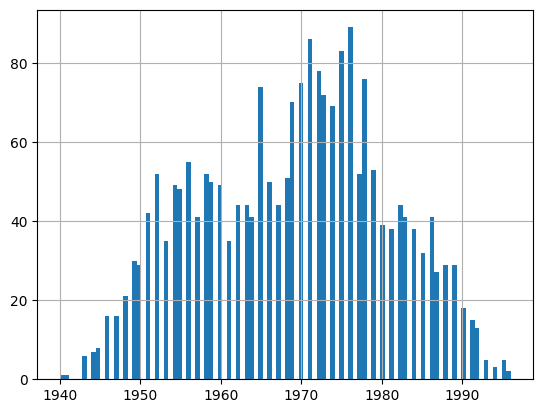

In [161]:
filtered_data_by_year_birth['Year_Birth'].hist(bins=100)
plt.show()

## Check for Income Values Outliers

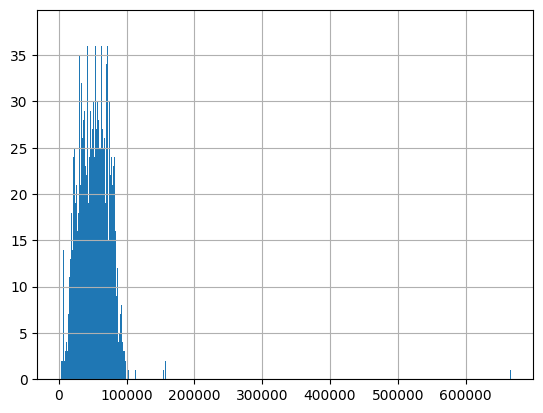

In [162]:
filtered_data_by_year_birth['Income'].hist(bins=800)
plt.show()

*Observations*

Based on the description and chart analysis, the following can be noted:

- The majority of income data points are concentrated in the range of 0 to 100,000.  
- A small number of data points fall within the range of 100,000 to 200,000, indicating that the income distribution is primarily within 0-200,000.  
- However, there is a single data point with a value of 666,000, which is significantly distant from the other data points.  

This suggests that it is likely an outlier or anomalous value, possibly due to data entry error.  

*→ Conclusion:*
To ensure the accuracy of the analysis, this anomalous data point will be excluded from the calculations.

In [163]:
filtered_data = filtered_data_by_year_birth[filtered_data_by_year_birth['Income'] <= 600000]

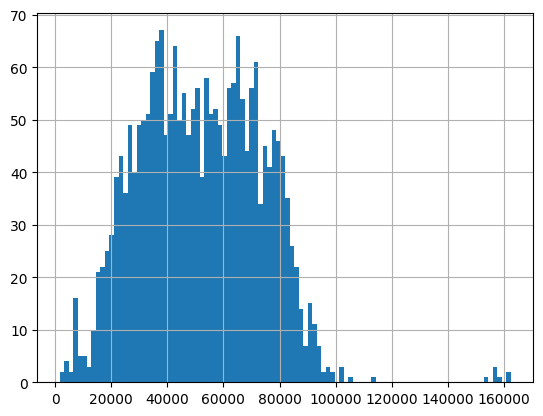

In [164]:
filtered_data['Income'].hist(bins=100)
plt.show()

In [165]:
filtered_data['Income'].describe()

count      2212.000000
mean      51958.810579
std       21527.278844
min        1730.000000
25%       35233.500000
50%       51371.000000
75%       68487.000000
max      162397.000000
Name: Income, dtype: float64